##### Importing all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Import data into tensorflow dataset object

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
for image_batch,label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.6475393  0.63185304 0.686755  ]
  [0.64280915 0.6271229  0.68202484]
  [0.65406984 0.63838357 0.6932855 ]
  ...
  [0.7182214  0.7064567  0.7339077 ]
  [0.71529335 0.70352864 0.7309796 ]
  [0.71236527 0.70060056 0.72805154]]

 [[0.6498817  0.63419545 0.6890974 ]
  [0.6416379  0.62595165 0.6808536 ]
  [0.6517273  0.63604105 0.690943  ]
  ...
  [0.7025863  0.6908216  0.71827257]
  [0.7031719  0.6914072  0.7188582 ]
  [0.7037575  0.6919928  0.7194438 ]]

 [[0.6522242  0.6365379  0.69143987]
  [0.6404667  0.6247804  0.6796824 ]
  [0.6493849  0.63369864 0.6886006 ]
  ...
  [0.70820844 0.69644374 0.7238947 ]
  [0.71055084 0.69878614 0.7262371 ]
  [0.71289337 0.70112866 0.72857964]]

 ...

 [[0.39040416 0.3747179  0.42961985]
  [0.39098978 0.3753035  0.43020546]
  [0.39157537 0.3758891  0.43079105]
  ...
  [0.46681568 0.44720784 0.47465882]
  [0.5682199  0.54861206 0.57606304]
  [0.5296973  0.51008946 0.53754044]]

 [[0.42615467 0.4104684  0.46537036]
  [0.43552446 0.4198382  0.47474015]


In [10]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [11]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [12]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.40213007 0.37075752 0.4217379 ]
  [0.40244952 0.37107697 0.42205736]
  [0.41000536 0.3786328  0.4296132 ]
  ...
  [0.60190296 0.5862167  0.65288335]
  [0.5970874  0.5814011  0.6480678 ]
  [0.59495705 0.5792708  0.64593744]]

 [[0.4222919  0.39091936 0.44189978]
  [0.42181274 0.3904402  0.44142058]
  [0.42808414 0.3967116  0.44769198]
  ...
  [0.6017965  0.58611023 0.6527769 ]
  [0.59714067 0.5814544  0.64812106]
  [0.5946908  0.5790045  0.6456712 ]]

 [[0.45467055 0.423298   0.47427842]
  [0.4542446  0.42287207 0.47385246]
  [0.45467192 0.42329937 0.47427976]
  ...
  [0.6003068  0.58462054 0.6512872 ]
  [0.5990033  0.58331704 0.6499837 ]
  [0.59866315 0.5829769  0.64964354]]

 ...

 [[0.43623617 0.38525578 0.4205499 ]
  [0.467998   0.4170176  0.45231172]
  [0.47722623 0.42624584 0.46153995]
  ...
  [0.6232452  0.5957942  0.6232452 ]
  [0.6221382  0.5946872  0.6221382 ]
  [0.62240446 0.5949534  0.62240446]]

 [[0.44248566 0.39150527 0.4267994 ]
  [0.48243344 0.43145305 0.46674716]


##### Building the Model

In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

##### Compiling the Model

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
1506/32

47.0625

In [17]:
215/32

6.71875

In [18]:
history = model.fit(
    train_generator, 
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 84s 2s/step - loss: 0.9370 - accuracy: 0.4579 - val_loss: 0.9180 - val_accuracy: 0.4479
Epoch 2/20
47/47 [==============================] - 81s 2s/step - loss: 0.8951 - accuracy: 0.4729 - val_loss: 0.8802 - val_accuracy: 0.5729
Epoch 3/20
47/47 [==============================] - 81s 2s/step - loss: 0.8834 - accuracy: 0.5692 - val_loss: 0.8067 - val_accuracy: 0.6927
Epoch 4/20
47/47 [==============================] - 83s 2s/step - loss: 0.6971 - accuracy: 0.6974 - val_loss: 0.6073 - val_accuracy: 0.7292
Epoch 5/20
47/47 [==============================] - 80s 2s/step - loss: 0.5803 - accuracy: 0.7639 - val_loss: 0.8995 - val_accuracy: 0.6979
Epoch 6/20
47/47 [==============================] - 80s 2s/step - loss: 0.4004 - accuracy: 0.8351 - val_loss: 0.5014 - val_accuracy: 0.7812
Epoch 7/20
47/47 [==============================] - 83s 2s/step - loss: 0.3588 - accuracy: 0.8589 - val_loss: 0.4159 - val_accuracy: 0.8333
Epoch 8/20
47/47 [==

In [19]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 8s 527ms/step - loss: 0.1907 - accuracy: 0.9420


In [20]:
scores

[0.19066326320171356, 0.94199538230896]

##### Plotting the Accuracy and Loss Curves

In [21]:
history

In [22]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
type(history.history['loss'])

list

In [25]:
len(history.history['loss'])

20

In [26]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9370467662811279,
 0.8950848579406738,
 0.8833534717559814,
 0.697050154209137,
 0.5803326368331909]

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [29]:
val_acc

[0.4479166567325592,
 0.5729166865348816,
 0.6927083134651184,
 0.7291666865348816,
 0.6979166865348816,
 0.78125,
 0.8333333134651184,
 0.84375,
 0.90625,
 0.890625,
 0.890625,
 0.921875,
 0.9375,
 0.9375,
 0.953125,
 0.9270833134651184,
 0.953125,
 0.875,
 0.9479166865348816,
 0.96875]

In [30]:
acc

[0.4579375982284546,
 0.47286295890808105,
 0.5691994428634644,
 0.6974219679832458,
 0.7639077305793762,
 0.8351424932479858,
 0.8588873744010925,
 0.8907734155654907,
 0.8928086757659912,
 0.8805969953536987,
 0.9158751964569092,
 0.9219809770584106,
 0.9294437170028687,
 0.9450474977493286,
 0.9450474977493286,
 0.9450474977493286,
 0.9592944383621216,
 0.9667571187019348,
 0.9592944383621216,
 0.9660786986351013]

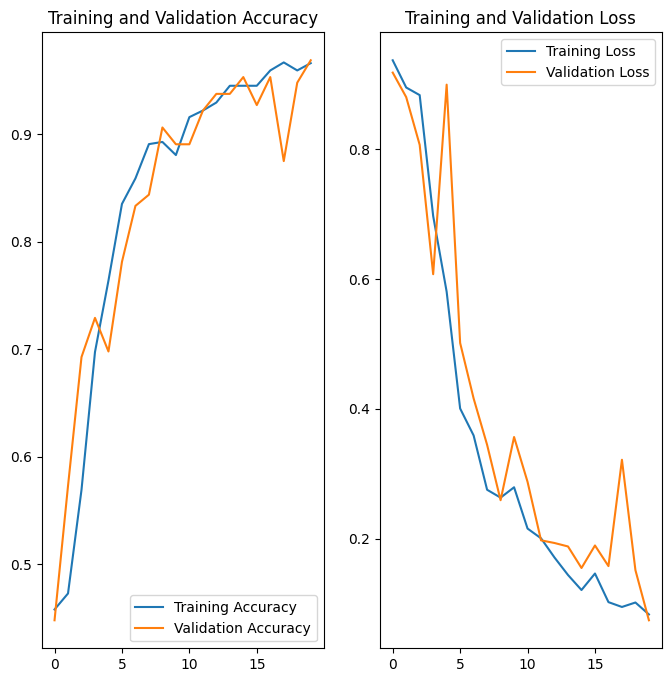

In [31]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 576ms/step
predicted label: Potato___Late_blight


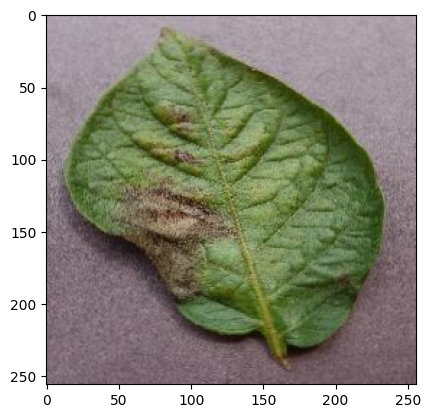

In [39]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

##### Write a function for inference

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 79ms/step


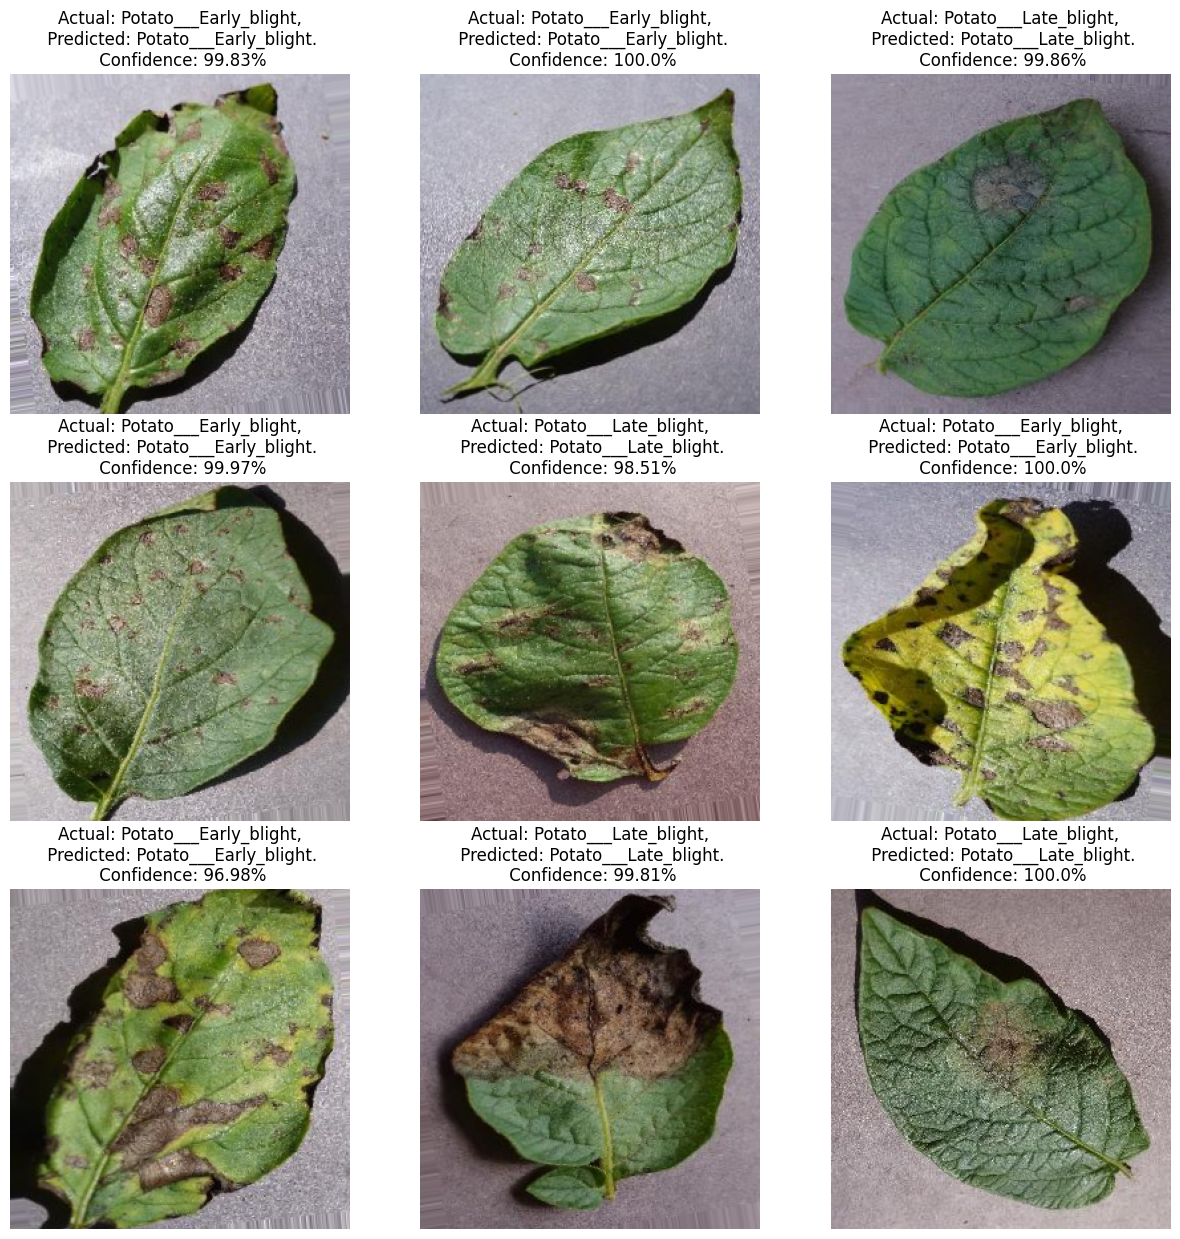

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

##### Saving the Model

In [43]:
model.save("../potatoes.h5")